Integrantes:

- Ana Paula Segundo Velazquez
- Beatriz Yunuen Gonzalez
- Fernando Vergara Méndez
- Jesimiel Arbelbirai Valdespino Vega
- Ricardo Velasco Carrasco
- Tania Montserrat

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objects as go

# Generación y uso de variables aleatorias

Daremos recopilación de métodos para generar variables aleatorias utilizados en simulación computacional. Se abordan distribuciones uniformes, exponenciales, normales, binomiales y Poisson, entre otras, así como técnicas como la transformada inversa y el método del rechazo.

Ejemplos comunes en simulación:
- Tiempo entre llegada de cada persona  
- Número de personas por minuto  
- Número de artículos por persona  
- Cantidad de dinero ganado cada hora  
- Tiempo de atención por cliente  
- Número de veces que la cajera solicita ayuda durante la jornada  
- Cantidad de gente que está formada  
- Número de personas que pagan con tarjeta

## Métodos de generación de números aleatorios rectangulares

La generación de variables aleatorias con esta distribución es importante porque las variables que tengan una distribución diferente, tendrán que usar a ésta como base.

- Cada posible resultado entre $a$ y $b$ tiene la misma probabilidad $1/n$.

Las variables generadas deben cumplir con:
- Los valores generados deben ser independientes y estar idénticamente distribuidos
- La secuencia generada debe ser lo más larga posible y ser reproducibles
- Debe permitir generar múltiples secuencias
- Que usen poca memoria

Históricamente se han usado cuatro tipos de métodos para generar sucesiones de números rectangulares:
- Métodos manuales
- Tablas de biblioteca
- Computación analógica
- Computación digital

### Generación pseudoaleatoria

La generación de los números aleatorios rectangulares debe realizarse a través de relaciones matemáticas de recurrencia. Por esta razón se consideran **pseudoaleatorios**, ya que el proceso para generarlos es determinístico.

Hay dos métodos que son los más utilizados para la generación. Ambos se basan en la siguiente definición:

**Definición.** Dos enteros $a$ y $b$ son congruentes módulo $m$ si su diferencia es un múltiplo entero de $m$ y se expresa como
$$𝑎 \equiv 𝑏 ( \text{𝑚o𝑑 } 𝑚)$$
Como consecuencia:
- $(a-b)$ es divisible entre $m$
- $a$ y $b$ dan el mismo residuo al ser divididos entre $m$


#### Método congruencial multiplicativo

Generar una secuencia de números pseudoaleatorios uniformes en el intervalo (0, 1) usando la siguiente fórmula recursiva:

$$n_{i+1} = a n_i \mod m$$
- $m$ debe ser tan grande como sea posible, dependiendo de los bits por palabra que maneje la computadora, descontando el bit del signo ($b$). Por lo tanto: $m = 2^b$
- $a$ debe satisfacer que $a \approx 2^{(b+1)/2}$ y que $a \equiv \pm 3 \mod 8$. La segunda expresión equivale a $( a-(\pm3 ) )$ es múltiplo de $8$.
- $n_0$: entero positivo impar menor a $m$
- El periodo será de longitud: $m/4$

In [3]:
# n0 : valor inicial o semilla
# a : multiplicador
# m : modulo (2^b)
# n : el número de numeros que quiero generar

def multiplicativo(n0,a,m,n):
    secuencia = []
    ni = n0 # iniciar con una semilla
    for _ in range(n):
        ni = (a * ni) % m # calculo el sig numero utilizando la formula recurrente
        secuencia.append(ni/m) # normaliza entre 0 y 1
    return secuencia

In [4]:
m = 2**31
a = 65539 # a ≡  +-3 mod 8
n0 = 12345
n=10

secuencia_mult = multiplicativo(n0,a,m,n)
print(secuencia_mult)

[0.37675674771890044, 0.2604887490160763, 0.17212176462635398, 0.6883318466134369, 0.5808951980434358, 0.29038456873968244, 0.5142506300471723, 0.4720426616258919, 0.20400029933080077, 0.9756178413517773]


In [5]:
import numpy as np
import plotly.graph_objects as go # Para gráficos interactivos

# Generamos ambas secuencias
secuencia_mult = multiplicativo(n0,a,m,n)
secuencia_numpy = np.random.uniform(0,1,n)

# figura con Plotly
fig = go.Figure()

# Añadir los histogramas
fig.add_trace(go.Histogram(
    x=secuencia_mult,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Método multiplicativo',
    marker_color='red'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Numpy random uniform',
    marker_color='blue'
))

fig.update_layout(
    barmode='overlay', #superpone los histogramas
    title = 'Compararación: Método multiplicativo -vs- Numpy',
    xaxis_title='valor generado',
    yaxis_title='Frecuencia',
    legend_title='Método',
    bargap=0.05
)

fig.show()

#### Método congruencial mixto

Este método genera números pseudoaleatorios con la fórmula:
$$n_{i+1} = (a n_i + c) \mod m$$

**Obs.** Se le llama “mixto” porque incluye una constante adicional $c$ (a diferencia del método multiplicativo).

- $m = 2^b$
- $a \approx 2^{(b-1)/2}$, $a \equiv 1 \mod 4$
- $c$, $n_0$: enteros positivos impares $< m$
- Periodo: $m$

In [6]:
# n0 : valor inicial o semilla
# a : multiplicador
# c : deber ser impar
# m : modulo (2^b)
# n : el número de numeros que quiero generar

def mixto(n0,a,c,m,n):
    secuencia = []
    ni = n0 # iniciar con una semilla
    for _ in range(n):
        ni = (a * ni + c) % m # calculo el sig numero utilizando la formula recurrente
        secuencia.append(ni/m) # normaliza entre 0 y 1
    return secuencia

In [7]:
m = 2**31
a = 1103515245 # a cong 1 mod----
c = 12345
n0 = 42
n= 10

secuencia_mixto = mixto(n0,a,c,m,n)
print(secuencia_mixto)

[0.5823075897060335, 0.5198187492787838, 0.46597642498090863, 0.7770372582599521, 0.42286502895876765, 0.03337232954800129, 0.41738913068547845, 0.8087285170331597, 0.6123396842740476, 0.7149040475487709]


In [8]:
# Generamos ambas secuencias
secuencia_mixto = mixto(n0,a,c,m,n)
secuencia_numpy = np.random.uniform(0,1,n)

# figura con Plotly
fig = go.Figure()

# Añadir los histogramas
fig.add_trace(go.Histogram(
    x=secuencia_mixto,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Método mixto',
    marker_color='red'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Numpy random uniform',
    marker_color='blue'
))

fig.update_layout(
    barmode='overlay', #superpone los histogramas
    title = 'Compararación: Método mixto -vs- Numpy',
    xaxis_title='valor generado',
    yaxis_title='Frecuencia',
    legend_title='Método',
    bargap=0.05
)

fig.show()

| **Método**     | **Fórmula**                            | **Ventajas**                                          | **Riesgos / Limitaciones**                                |
|----------------|----------------------------------------|-------------------------------------------------------|------------------------------------------------------------|
| Multiplicativo | \( n_{i+1} = a n_i \mod m \)           | Rápido, menos memoria                                 | Menor aleatoriedad, requiere \( a, m, n_0 \) bien elegidos |
| Mixto          | \( n_{i+1} = (a n_i + c) \mod m \)     | Mejor distribución, periodo completo posible          | Más complejo, pero más robusto                             |
| NumPy (`uniform`) | Motor moderno y validado           | Alta calidad, probado, rápido                         | Caja negra, sin control del generador interno              |


In [9]:
import random
n = 1000

# Generar secuencia usando random.random()
secuencia_random = [random.random() for _ in range(n)]

# Generar secuencia usando numpy
secuencia_numpy = np.random.uniform(0, 1, n)

# Graficar histogramas
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=secuencia_random,
    nbinsx=40,
    opacity=0.6,
    name='random.random()',
    marker_color='crimson'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx=40,
    opacity=0.6,
    name='numpy.random.uniform',
    marker_color='royalblue'
))

fig.update_layout(
    barmode='overlay',
    title='Comparación: random.random() vs numpy.random.uniform',
    xaxis_title='Valor generado',
    yaxis_title='Frecuencia',
    legend_title='Método',
    bargap=0.05
)

fig.show()

## Metodos de generación de numeros aleatorios no rectangulares

#### Método de la transformada inversa

El método utiliza la función de distribución $F(x)$ de la distribución que se va a simular
$$F(x) = \int_{-\infty}^{x} f(t)\,dt$$

![image.png](attachment:aeaa5ec8-f8cb-4c7d-89af-44a240c12c61.png)

Como se sabe, los valores de $F(x)$ están en el intervalo $(0,1)$ al igual que los números rectangulares $U$.

El método genera un $U$ y trata de determinar el valor de la variable aleatoria para la cual $F(x)$ sea igual a $U$.

Si $U \in (0,1)$:
$$ F(x) = U \quad \Rightarrow \quad x = F^{-1}(U)$$

![image.png](attachment:e7665e52-3ff6-474b-8d59-0027b66ef343.png)

$\mathbf{Teorema}.$ Sea $X$ una variable aleatoria real. Supongamos que su función de distribución $F$ es estrictamente creciente (por lo que $F$ es una biyección de $\mathbb{R}$ sobre $(0,1)$ y podemos denotar por $F^{-1}$ a su inversa). Sea $U\sim \text{unif}[0,1]$. Entonces $F^{-1}(U)$ tiene la misma ley que $X$.

Si $F$ no es estrictamente creciente, hemos visto que el teorema precedente sigue siendo válido bajo la condición de definir
$$F^{-1}(u)=\inf\{ x\in \mathbb{R} : F(x)\geq u\},$$
la inversa generalizada de $F$.

In [10]:
# Vamos a simular una v.a. Bernoulli usando una Uniforme
import random
def bernoulli(p):
    u = random.random() # U -> Unif(0,1)
    return 1 if u <= p else 0

In [11]:
# Simulamos n valores con p de éxito
p = 0.5
simulaciones = [bernoulli(p) for _ in range(100)]
print(simulaciones)

[0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]


In [12]:
sum(simulaciones)

43

## Ejemplo: Distribución exponencial

sea $\theta,\lambda>0$, entonces a través del teorema se puede generar una v.a. exponencial.

Sea $U \sim Unif[0,1]$, entonces si $X\sim Exp(\lambda)$, entonces

$$f_{X}(x) = \lambda e^{-\lambda x}$$
y que
$$ F_X(x) = 1-e^{-\lambda x} $$

Sabemos que $1-e^{-\lambda x} = U$, entonces $1-U = e^{-\lambda x}$, y tomando logaritmo, se tiene que
$ \ln(1-U) = -\lambda x$ y como $U$ es uniforme entonces $U \sim 1-U$, por lo que depejando a $x$, se tiene que
$$ X = -\frac{\ln(U)}{\lambda} \sim Exp(\lambda) $$

## Ejemplo: Distribución Uniforme Continua
$$f(x) = \frac{1}{b-a}, \quad a \leq x \leq b$$
$$F(x) = \frac{x-a}{b-a} = U \Rightarrow x = a + (b-a)U$$

In [13]:
import numpy as np
import plotly.graph_objects as go

# Semilla
np.random.seed(123)

# Parámetro de la exponencial
lambd = 4
n = 10000

# Simulación usando transformada inversa
uniformes = np.random.random(n)
exponenciales = -np.log(uniformes) / lambd

# Curva teórica
x_vals = np.linspace(0, exponenciales.max(), 300)
y_vals = lambd * np.exp(-lambd * x_vals)

# Gráfico
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=exponenciales,
    nbinsx=40,
    histnorm='probability density',
    marker_color='skyblue',
    name='Simulación'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='darkblue')
))

fig.update_layout(
    title='Distribución Exponencial simulada vs teórica (λ = 1)',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

In [14]:
# Parámetros de la uniforme
a, b = 2, 5
n = 10000

# Simulación por transformación lineal
uniformes = np.random.random(n)
uniforme_continua = a + (b - a) * uniformes

# Densidad teórica (constante)
x_vals = np.linspace(a, b, 300)
y_vals = np.ones_like(x_vals) * (1 / (b - a))

# Gráfico
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=uniforme_continua,
    nbinsx=40,
    histnorm='probability density',
    marker_color='orange',
    name='Simulación'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='red')
))

fig.update_layout(
    title='Distribución Uniforme Continua simulada vs teórica [2, 5]',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()


$\mathbf{Ejemplo}$ (Variable aleatoria Cauchy) Simulemos la variable aleatoria de Cauchy de parámetro $1$ que tiene por función de densidad
$$f(x) = \frac{1}{\pi}\frac{1}{1+x^{2}}.$$

Ejercicio:

a) Corroborar que la función así definida es una función de densidad de probabilidad

b) Encontrar F_X

c) Crear una gráfica en Python que muestre su forma

d) Generar v.a. Cauchy a partir de una uniforme

Por el teorema anterior, para $u\in (0,1)$

$$u=\frac{1}{\pi}\arctan(x)+\frac{1}{2} \qquad \text{si y sólo si} \qquad x=\tan\left({\pi}\left(u-\frac{1}{2} \right) \right).$$

Solución a)
Recordemos que se deben de cumplir dos cosas:

i) No negativa. $f(x)≥0$ para todo $x \in \mathbb{R}$.

ii) $\int_{-\infty}^{\infty} f(x)\,dx = 1$

Solución i) Notemos que $x^2>0$ para todo $x \in \mathbb{R}$, así $\frac{1}{1+x^{2}}>0$ por lo tanto $f(x)>0$ para todo $x \in \mathbb{R}$

Solución ii)

$\int_{-\infty}^{\infty} \frac{1}{\pi}\frac{1}{1+x^{2}} \, dx = \frac{1}{\pi} \int_{-\infty}^{\infty} \frac{1}{1+x^{2}} \, dx = \frac{\text{arcTan}(x)}{\pi}|_{-\infty}^{\infty} = 1$


Solución b)

$$F(x) = \int_{-\infty}^{x} f(t)\,dt =
\int_{-\infty}^{x} \frac{1}{\pi}\frac{1}{1+t^{2}} \,dt =
\frac{1}{\pi} \int_{-\infty}^{x} \frac{1}{1+t^{2}} \, dt =
\frac{\text{arcTan}(t)}{\pi}|_{-\infty}^{x} =
\frac{\text{arcTan}(x)}{\pi} - \frac{\text{arcTan}(-∞)}{\pi} =
\frac{\text{arcTan}(x)}{\pi} - \frac{-\pi}{2 \pi} =
\frac{1}{\pi} \text{arcTan}(x) + \frac{\pi}{2}
$$


Así

$$ F(x) = \frac{1}{\pi} \text{arcTan}(x) + \frac{\pi}{2} $$

c) Crear una gráfica en Python que muestre su forma

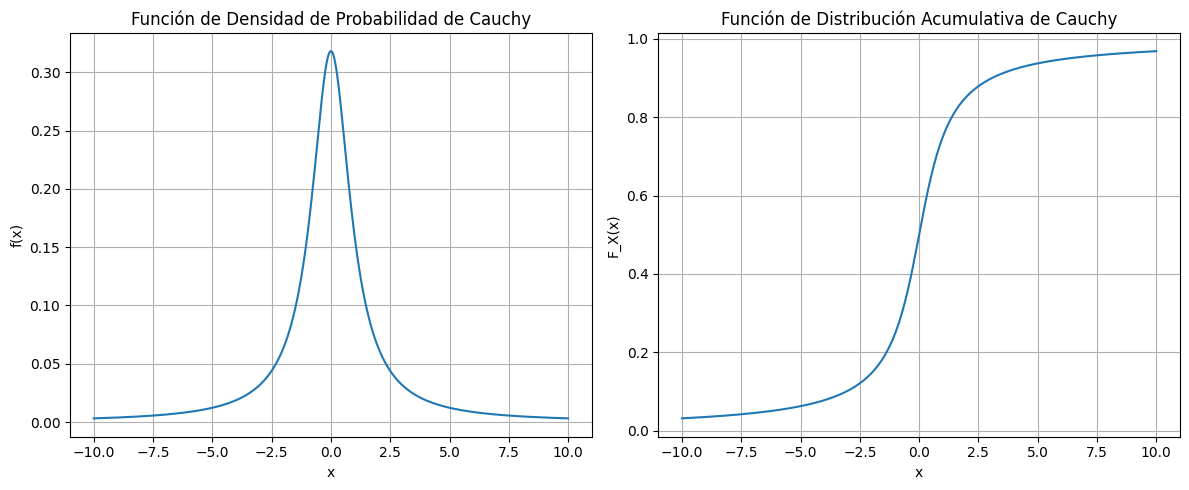

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores para x
x = np.linspace(-10, 10, 500)

# Definir la función de densidad de probabilidad de Cauchy
def cauchy_pdf(x):
    return 1 / (np.pi * (1 + x**2))

# Calcular los valores de la PDF
pdf_values = cauchy_pdf(x)

plt.figure(figsize=(12, 5))  # Ajustar el tamaño de la figura para dos subgráficos
plt.subplot(1, 2, 1)

plt.plot(x, pdf_values, label='Función de Densidad de Cauchy')
plt.title('Función de Densidad de Probabilidad de Cauchy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)


# Graficar la CDF
def cauchy_cdf(x):
    return (1 / np.pi) * np.arctan(x) + 0.5

cdf_values = cauchy_cdf(x)

plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='Función de Distribución Acumulativa de Cauchy')
plt.title('Función de Distribución Acumulativa de Cauchy')
plt.xlabel('x')
plt.ylabel('F_X(x)')
plt.grid(True)
plt.tight_layout()  # Ajusta el espaciado entre subgráficos
plt.show()


d) Generar variable aleatoria Cauchy a partir de una uniforme

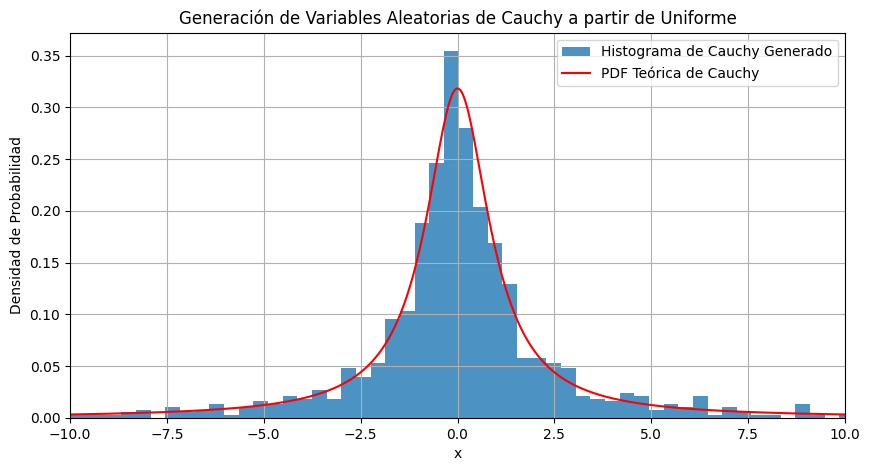

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generar números aleatorios uniformes en (0, 1)

num_samples = 1000
uniform_samples = np.random.uniform(0, 1, num_samples)

# Generar variables aleatorias de Cauchy utilizando la transformada inversa
cauchy_generated = np.tan(np.pi * (uniform_samples - 0.5))

# Graficar el histograma de las variables aleatorias de Cauchy generadas
plt.figure(figsize=(10, 5))
plt.hist(cauchy_generated, bins=500, density=True, alpha=0.8, label='Histograma de Cauchy Generado')

# Superponer la función de densidad de probabilidad teórica de Cauchy
x_range = np.linspace(-10, 10, 500)
pdf_theoretical = cauchy_pdf(x_range)

plt.plot(x_range, pdf_theoretical, 'r-', label='PDF Teórica de Cauchy')

plt.title('Generación de Variables Aleatorias de Cauchy a partir de Uniforme')
plt.xlabel('x')
plt.ylabel('Densidad de Probabilidad')
plt.xlim(-10, 10)
plt.legend()
plt.grid(True)
plt.show()